# Statistics

In [100]:
from collections import Counter
from typing import List
import matplotlib.pyplot as plt
import random

## Generated skewed data

In [101]:
number_of_friends = [
    100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,
    15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,
    10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,
    9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,
    8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,
    6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
    5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,
    4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
    3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,
    1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
]

daily_minutes = [
    1,68.77,51.25,52.08,38.36,44.54,57.13,
    51.4,41.42,31.22,34.76,54.01,38.79,47.59,
    49.1,27.66,41.03,36.73,48.65,28.12,46.62,
    35.57,32.98,35,26.07,23.77,39.73,40.57,
    31.65,31.21,36.32,20.45,21.93,26.02,27.34,
    23.49,46.94,30.5,33.8,24.23,21.4,27.94,
    32.24,40.57,25.07,19.42,22.39,18.42,46.96,
    23.72,26.41,26.97,36.76,40.32,35.02,29.47,
    30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,
    28.66,29.08,37.28,15.28,24.17,22.31,30.17,
    25.53,19.85,35.37,44.6,17.23,13.47,26.33,
    35.02,32.09,24.81,19.33,28.77,24.26,31.98,
    25.73,24.86,16.28,34.51,15.23,39.72,40.8,
    26.06,35.76,34.76,16.13,44.04,18.03,19.65,
    32.62,35.59,39.43,14.18,35.24,40.13,41.82,
    35.45,36.07,43.67,24.61,20.9,21.9,18.79,
    27.61,27.21,26.61,29.77,20.59,27.53,13.82,
    33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,
    25.53,24.62,26.25,18.21,28.08,19.42,29.79,
    32.8,35.99,28.32,27.79,35.88,29.06,36.28,
    14.1,36.63,37.49,26.9,18.58,38.48,24.48,
    18.95,33.55,14.24,29.04,32.51,25.63,22.22,
    19,32.73,15.16,13.9,27.2,32.01,29.27,33,
    13.74,20.42,27.32,18.23,35.35,28.48,9.08,
    24.62,20.12,35.26,19.92,31.02,16.49,12.16,
    30.7,31.22,34.65,13.13,27.51,33.2,31.57,
    14.1,33.42,17.44,10.12,24.42,9.82,23.39,
    30.93,15.03,21.67,31.09,33.29,22.61,26.89,
    23.48,8.38,27.81,32.35,23.84
]

In [102]:
friend_counts = Counter(number_of_friends)

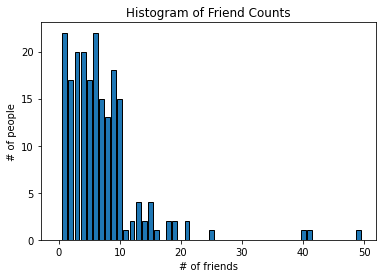

In [103]:
xs = range(50)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys, edgecolor='black')

plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")

plt.show()

## Generate Descriptive Statistics

In [104]:
num_observations = len(number_of_friends)

print(f"Number of observations: {num_observations}")

Number of observations: 204


In [105]:
largest_value = max(number_of_friends)
smallest_value = min(number_of_friends)
                     
print(f"Largest value: {largest_value}")
print(f"Smallest value: {smallest_value}")

Largest value: 100.0
Smallest value: 1


## Central Tendencies

In [106]:
def mean(xs: List[float]) -> float:
    """Calculate the mean of a list of numbers"""
    return sum(xs)/len(xs)

friends_mean = mean(xs=number_of_friends)
scale_friends_mean = mean(xs=[obs * 10 for obs in number_of_friends])
shift_friends_mean = mean(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_mean = mean(xs=number_of_friends+[1000000])


print(f"mean: {friends_mean}")
print(f"mean scaled (x 10): {scale_friends_mean}")
print(f"mean shifted (+ 10): {shift_friends_mean}")
print(f"mean with outlier: {round(outlier_friends_mean, 2)}")

mean: 7.333333333333333
mean scaled (x 10): 73.33333333333333
mean shifted (+ 10): 17.333333333333332
mean with outlier: 4885.35


In [107]:
def median_odd(xs: List[float], length) -> float:
    """Calculate the median if length of list of numbers is odd"""
    
    return sorted(xs)[length // 2]

def median_even(xs: List[float], length) -> float:
    """Calculate the median if length of list of numbers is even"""
    midpoint = length / 2
    left_of_midpoint = int(midpoint)
    right_of_midpoint = int(midpoint) + 1
    sorted_list = sorted(xs)
    
    return mean(sorted_list[left_of_midpoint:right_of_midpoint+1])

def median(xs: List[float]) -> float:
    """Calculate the median of a list of numbers"""
    length = len(xs)
    if length % 2 != 0:
        return median_odd(xs, length=length)
    if length % 2 == 0:
        return median_even(xs, length=length)
    
friends_median = median(xs=number_of_friends)
scale_friends_median = median(xs=[obs * 10 for obs in number_of_friends])
shift_friends_median = median(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_median = median(xs=number_of_friends+[1000000])

print(f"median: {friends_median}")
print(f"median scaled (x 10): {scale_friends_median}")
print(f"median shifted (+ 10): {shift_friends_median}")
print(f"median with outlier: {outlier_friends_median}")

median: 6.0
median scaled (x 10): 60.0
median shifted (+ 10): 16.0
median with outlier: 6


In [108]:
def quantile(xs: List[float], p:float) -> float:
    """Returns the p-th percentile value in x"""
    p_index = int(p * len(xs))
    
    return sorted(xs)[p_index]

tenth_percentile = quantile(xs=number_of_friends, p=0.1)
friends_median = quantile(xs=number_of_friends, p=0.5) # AKA median

print(f"10th percentile: {tenth_percentile}")
print(f"median: {friends_median}")

10th percentile: 1
median: 6


In [109]:
def mode(xs: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(number_of_friends)
    max_count = max(counts.values())
    
    return [x_i for x_i, count in counts.items() if count == max_count]

friends_mode = mode(xs=number_of_friends)
scale_friends_mode = mode(xs=[obs * 10 for obs in number_of_friends])
shift_friends_mode = mode(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_mode = mode(xs=number_of_friends+[1000000])

print(f"mode: {friends_mode}")
print(f"mode scaled (x 10): {scale_friends_mode}")
print(f"mode shifted (+ 10): {shift_friends_mode}")
print(f"mode with outlier: {outlier_friends_mode}")

mode: [6, 1]
mode scaled (x 10): [6, 1]
mode shifted (+ 10): [6, 1]
mode with outlier: [6, 1]


## Dispersion

In [110]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

friends_data_range = data_range(number_of_friends)

print(f"range of data: {friends_data_range}")

range of data: 99.0


In [111]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by substracting its mean (so result has mean 0)"""
    x_bar = mean(xs)
    
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviatioin from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    
    n = len(xs)
    deviations = de_mean(xs)
    
    return sum_of_squares(deviations) / n -1

friends_variance = variance(number_of_friends)
scale_friends_variance = variance(xs=[obs * 10 for obs in number_of_friends])
shift_friends_variance = variance(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_variance = variance(xs=number_of_friends+[1000000])

print(f"variance: {friends_variance}")
print(f"variance scaled (x 10): {scale_friends_variance}")
print(f"variance shifted (+ 10): {shift_friends_variance}")
print(f"variance with outlier: {outlier_friends_variance}")

variance: 80.14379084967331
variance scaled (x 10): 8113.379084967282
variance shifted (+ 10): 80.14379084967331
variance with outlier: 4854182304.87517


In [112]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    
    return math.sqrt(variance(xs))

friends_standard_deviation = standard_deviation(xs=number_of_friends)
scale_friends_standard_deviation = standard_deviation(xs=[obs * 10 for obs in number_of_friends])
shift_friends_standard_deviation = standard_deviation(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_standard_deviation = standard_deviation(xs=number_of_friends+[1000000])

print(f"standard deviation: {friends_standard_deviation}")
print(f"standard deviation scaled (x 10): {scale_friends_standard_deviation}")
print(f"standard deviation shifted (+ 10): {shift_friends_standard_deviation}")
print(f"standard deviation with outlier: {outlier_friends_standard_deviation}")

standard deviation: 8.952306454186726
standard deviation scaled (x 10): 90.07429758242516
standard deviation shifted (+ 10): 8.952306454186726
standard deviation with outlier: 69671.96211443431


In [113]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    
    return quantile(xs, 0.75) - quantile(xs, 0.25)

friends_interquartile_range = interquartile_range(xs=number_of_friends)
scale_friends_interquartile_range = interquartile_range(xs=[obs * 10 for obs in number_of_friends])
shift_friends_interquartile_range = interquartile_range(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_interquartile_range = interquartile_range(xs=number_of_friends+[1000000])

print(f"interquartile range: {friends_interquartile_range}")
print(f"interquartile range scaled (x 10): {scale_friends_interquartile_range}")
print(f"interquartile range shifted (+ 10): {shift_friends_interquartile_range}")
print(f"interquartile range with outlier: {outlier_friends_interquartile_range}")

interquartile range: 6
interquartile range scaled (x 10): 60
interquartile range shifted (+ 10): 6
interquartile range with outlier: 6


# Correlation

In [114]:
from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys very in tandem from there means"""
    
    assert len(xs) == len(ys), "xs and ys must have the same number of elements"
    
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

covar_friends_vs_minutes = covariance(number_of_friends, daily_minutes)
covar_friends_vs_minutes_shift = covariance(number_of_friends, [minutes + 10 for minutes in daily_minutes])
covar_friends_vs_minutes_both_shift = covariance(
    [friends + 5 for friends in number_of_friends], [minutes + 10 for minutes in daily_minutes]
)
covar_friends_vs_minutes_both_shift_same = covariance(
    [friends + 10 for friends in number_of_friends], [minutes + 10 for minutes in daily_minutes]
)

print(f"covariance: {covar_friends_vs_minutes}")
print("")
print("Shift")
print(f"covariance_shift_1: {covar_friends_vs_minutes_shift}")
print(f"covariance_shift_both: {covar_friends_vs_minutes_both_shift}")
print(f"covariance_shift_both_the_same: {covar_friends_vs_minutes_both_shift_same}")
print("")
print("Outlier")
covar_friends_vs_minutes_with_outlier = covariance(number_of_friends + [2], daily_minutes + [10000])
print(f"covariance_with_outlier: {covar_friends_vs_minutes_with_outlier}")
print("")
print("Scale")
covar_friends_vs_minutes_scale = covariance(number_of_friends, [minutes*60 for minutes in daily_minutes])
covar_friends_vs_minutes_both_scale = covariance(
    [friends*30 for friends in number_of_friends], [minutes*60 for minutes in daily_minutes]
)
covar_friends_vs_minutes_both_scale_same = covariance(
    [friends*60 for friends in number_of_friends], [minutes*60 for minutes in daily_minutes]
)    
print(f"covariance_scale_1: {covar_friends_vs_minutes_scale}")
print(f"covariance_scale_both: {covar_friends_vs_minutes_both_scale}")
print(f"covariance_scale_both_the_same: {covar_friends_vs_minutes_both_scale_same}")
print("")
print("Variance scales with variables, so hard to say what is large variance and vice versa.")


covariance: 22.425435139573064

Shift
covariance_shift_1: 22.42543513957307
covariance_shift_both: 22.425435139573068
covariance_shift_both_the_same: 22.425435139573075

Outlier
covariance_with_outlier: -237.09196676231466

Scale
covariance_scale_1: 1345.5261083743835
covariance_scale_both: 40365.78325123154
covariance_scale_both_the_same: 80731.56650246309

Variance scales with variables, so hard to say what is large variance and vice versa.


In [115]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys very in tandem from there means"""
    
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    
    if stdev_x > 0 and stdev_y > 0:
        return dot([x / stdev_x for x in de_mean(xs)], [y / stdev_y for y in de_mean(ys)]) / (len(xs) - 1)  
    else:
        return 0 # if no variation, correlation is zero
    
    

corr_friends_vs_minutes = correlation(number_of_friends, daily_minutes)
corr_friends_vs_minutes_shift = correlation(number_of_friends, [minutes + 10 for minutes in daily_minutes])
corr_friends_vs_minutes_both_shift = correlation(
    [friends + 5 for friends in number_of_friends], [minutes + 10 for minutes in daily_minutes]
)
corr_friends_vs_minutes_both_shift_same = correlation(
    [friends + 10 for friends in number_of_friends], [minutes + 10 for minutes in daily_minutes]
)

print(f"correlation: {corr_friends_vs_minutes}")
print("")
print("Shift")
print(f"correlation_shift_1: {corr_friends_vs_minutes_shift}")
print(f"correlation_shift_both: {corr_friends_vs_minutes_both_shift}")
print(f"correlation_shift_both_the_same: {corr_friends_vs_minutes_both_shift_same}")
print("")
print("Outlier")
corr_friends_vs_minutes_with_outlier = correlation(number_of_friends + [2], daily_minutes + [10000])
print(f"covariance_with_outlier: {corr_friends_vs_minutes_with_outlier}")
print("")
print("Scale")
corr_friends_vs_minutes_scale = correlation(number_of_friends, [minutes*10 for minutes in daily_minutes])
corr_friends_vs_minutes_both_scale = correlation(
    [friends*5 for friends in number_of_friends], [minutes*10 for minutes in daily_minutes]
)
corr_friends_vs_minutes_both_scale_same = correlation(
    [friends*10 for friends in number_of_friends], [minutes*10 for minutes in daily_minutes]
) 
print(f"correlation_scale_1: {corr_friends_vs_minutes_scale}")
print(f"correlation_scale_both: {corr_friends_vs_minutes_both_scale}")
print(f"correlation_scale_both_the_same: {corr_friends_vs_minutes_both_scale_same}")
print("")
print("Correlation does not scale significantly with variables, and is always between -1 and 1.")

correlation: 0.2513906588002354

Shift
correlation_shift_1: 0.25139065880023553
correlation_shift_both: 0.2513906588002354
correlation_shift_both_the_same: 0.2513906588002356

Outlier
covariance_with_outlier: -0.038180190536862155

Scale
correlation_scale_1: 0.2501466947098087
correlation_scale_both: 0.24866183389588298
correlation_scale_both_the_same: 0.24861585709229378

Correlation does not scale significantly with variables, and is always between -1 and 1.
